# Régressions linéaires avec Statsmodels et Scikit-Learn

On peut réaliser des régressions linéaires de beaucoup de manières avec Python. 
On en a retenu 2, statsmodels et scikit-learn. Les deux librairies ont chacunes leurs qualités et leurs défauts, sachez que l'une est plus orienté data science et l'autre plus pour des économistes. 


Par exemple, statsmodel vous fournira directement le tableau de regression, pour scikit c'est moins immédiat 
On commence par charger tous les packages qui vont servir dans ce notebook : 

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

On va utiliser la fameuse base des Iris qu'on peut appeler depuis la librairie seaborn.
Pour chaque fleur, on a des informations sur la longueur et largeur de ses sépales ainsi que de ses pétales.

Pour comprendre la différence en image : [Sépale](http://idao.cirad.fr/content/adventoi/defs/235_fr.html).

In [3]:
iris = sns.load_dataset("iris")
#1 Afficher les 5 premières ligne du dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# 2 Afficher le type de la structure de données 'iris' (utliser la fonction type() de python)
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [45]:
#3 Afficher seulement les observations qui appartiennent à la espèce 'setosa' 
#code ici
iris[iris['species'] == 'setosa'][iris['petal_length'] < 1.4]

<ipython-input-45-f5aa77594ef0>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  iris[iris['species'] == 'setosa'][iris['petal_length'] < 1.4]


,sepal_length,sepal_width,petal_length,petal_width,species
2,4.7,3.2,1.3,0.2,setosa
13,4.3,3.0,1.1,0.1,setosa
14,5.8,4.0,1.2,0.2,setosa
16,5.4,3.9,1.3,0.4,setosa
22,4.6,3.6,1.0,0.2,setosa
35,5.0,3.2,1.2,0.2,setosa
36,5.5,3.5,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
40,5.0,3.5,1.3,0.3,setosa
41,4.5,2.3,1.3,0.3,setosa


In [39]:
#3 Afficher seulement les observations dont la sepal_length est > à 5
#code ici
iris[iris['sepal_length'] > 5]

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica,score_species
0,5.1,3.5,1.4,0.2,setosa,1,0,0,1
5,5.4,3.9,1.7,0.4,setosa,1,0,0,1
10,5.4,3.7,1.5,0.2,setosa,1,0,0,1
14,5.8,4.0,1.2,0.2,setosa,1,0,0,1
15,5.7,4.4,1.5,0.4,setosa,1,0,0,1
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0,0,1,0
146,6.3,2.5,5.0,1.9,virginica,0,0,1,0
147,6.5,3.0,5.2,2.0,virginica,0,0,1,0
148,6.2,3.4,5.4,2.3,virginica,0,0,1,0


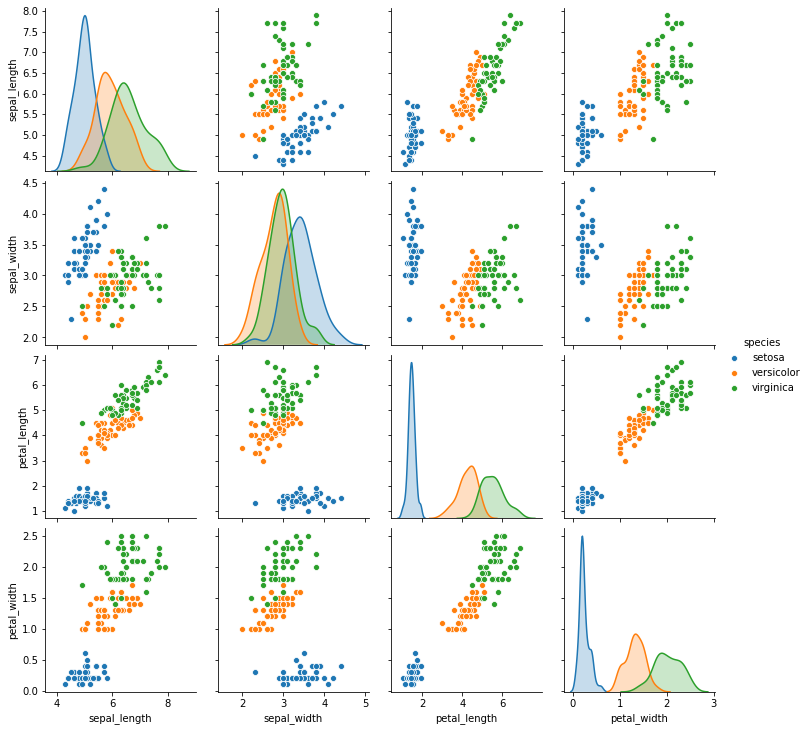

In [5]:
sns.pairplot(iris, hue="species")

Grâce à ces graphiques, on observe une forte relation entre la longeur et la largeur des pétales. 
On réalise une regression à une variable entre la longueur et la largeur grâce à seaborn. 

## Regression à une variable avec seaborn

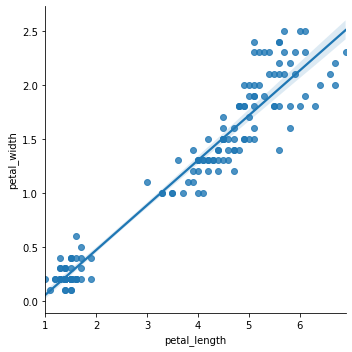

In [6]:
sns.lmplot(x="petal_length", y="petal_width", data=iris);

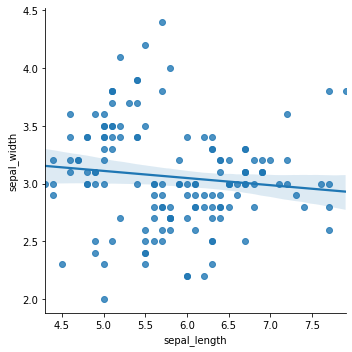

In [7]:
# 4 Afficher le plot du sepal_width en fonction du sepal_length
# code ici
sns.lmplot(x="sepal_length", y="sepal_width", data=iris);
# 5 Que remarquez vous

Si on observe bien qu'une relation existe, on ne connait pas grand chose d'autre. 

## Regression en utilisant scikit-learn

In [19]:
X = iris[["petal_length"]] # la variable prédictive
y = iris["petal_width"] # la variable cible

# On fit le modele
model = linear_model.LinearRegression()

# 6 Entrainez le modèle en utlisant la fonction fit() de sklearn (voir la documentation)
results = model.fit(X, y)

In [35]:
y

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

In [47]:
results.predict(X)

array([0.21898206, 0.21898206, 0.17740652, 0.2605576 , 0.21898206,
       0.34370869, 0.21898206, 0.2605576 , 0.21898206, 0.2605576 ,
       0.2605576 , 0.30213314, 0.21898206, 0.09425544, 0.13583098,
       0.2605576 , 0.17740652, 0.21898206, 0.34370869, 0.2605576 ,
       0.34370869, 0.2605576 , 0.0526799 , 0.34370869, 0.42685977,
       0.30213314, 0.30213314, 0.2605576 , 0.21898206, 0.30213314,
       0.30213314, 0.2605576 , 0.2605576 , 0.21898206, 0.2605576 ,
       0.13583098, 0.17740652, 0.21898206, 0.17740652, 0.2605576 ,
       0.17740652, 0.17740652, 0.17740652, 0.30213314, 0.42685977,
       0.21898206, 0.30213314, 0.21898206, 0.2605576 , 0.21898206,
       1.59097494, 1.50782385, 1.67412602, 1.29994614, 1.54939939,
       1.50782385, 1.59097494, 1.00891735, 1.54939939, 1.2583706 ,
       1.09206844, 1.38309723, 1.29994614, 1.59097494, 1.13364398,
       1.46624831, 1.50782385, 1.34152169, 1.50782385, 1.2583706 ,
       1.63255048, 1.29994614, 1.67412602, 1.59097494, 1.42467

In [33]:
model.predict(X)

array([0.21898206, 0.21898206, 0.17740652, 0.2605576 , 0.21898206,
       0.34370869, 0.21898206, 0.2605576 , 0.21898206, 0.2605576 ,
       0.2605576 , 0.30213314, 0.21898206, 0.09425544, 0.13583098,
       0.2605576 , 0.17740652, 0.21898206, 0.34370869, 0.2605576 ,
       0.34370869, 0.2605576 , 0.0526799 , 0.34370869, 0.42685977,
       0.30213314, 0.30213314, 0.2605576 , 0.21898206, 0.30213314,
       0.30213314, 0.2605576 , 0.2605576 , 0.21898206, 0.2605576 ,
       0.13583098, 0.17740652, 0.21898206, 0.17740652, 0.2605576 ,
       0.17740652, 0.17740652, 0.17740652, 0.30213314, 0.42685977,
       0.21898206, 0.30213314, 0.21898206, 0.2605576 , 0.21898206,
       1.59097494, 1.50782385, 1.67412602, 1.29994614, 1.54939939,
       1.50782385, 1.59097494, 1.00891735, 1.54939939, 1.2583706 ,
       1.09206844, 1.38309723, 1.29994614, 1.59097494, 1.13364398,
       1.46624831, 1.50782385, 1.34152169, 1.50782385, 1.2583706 ,
       1.63255048, 1.29994614, 1.67412602, 1.59097494, 1.42467

In [10]:
print(results.intercept_, results.coef_)

-0.3630755213190291 [0.41575542]


La meilleure approximation linéaire est donc y=ax + b avec 
- b = −0.363075521319
- a = 0.41575542

Mais en termes de présentation de résultats, c'est un peu limité... Pas de standard errors, pas de $R^2$ etc (du moins pas automatiquement) 

## Regression en utilisant statsmodels

Remarque : on invese X et y dans la spécification du modèle pour cette librairie. 

In [11]:
model = sm.OLS(y, X)
results = model.fit()
# Avec  statsmodel, on a une sortie qui ressemble beaucoup à celle de R
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            petal_width   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              4417.
Date:                Wed, 06 May 2020   Prob (F-statistic):                   1.22e-112
Time:                        23:18:51   Log-Likelihood:                         -8.7179
No. Observations:                 150   AIC:                                      19.44
Df Residuals:                     149   BIC:                                      22.45
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Si vous regardez de plus près, vous observez que les coefficients des deux régressions sont proches mais pas égaux. Problème de précision ? Non...

Il faut faire attention avec statsmodels, il n'inclut pas de lui-même un intercept ($\beta_0$) alors que scikit learn le fait. 

In [18]:
X = iris["petal_length"]
X = np.vander(X, 2) #ici on ajoute une colonne de constante 1
y = iris["petal_width"]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Thu, 07 May 2020   Prob (F-statistic):           4.68e-86
Time:                        13:27:03   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4158      0.010     43.387      0.0

Ca y est, les coefficients de scikit et de statsmodels sont quasi identiques (en réalité si vous regardez après la 10ème décimale, ils sont légèrement différents...)

Si on regadre le $R^2$, on se dit qu'on est plutôt pas mal pour cette régression (en même temps, dire que pour un iris, la longueur et la largeur du pétale sont corrélées, c'est un peu normal...)'

Mais voyons si on peut aller encore plus loin, par exemple, en ajoutant l'information de l'espèce de l'iris, avec des variables catégorielles (qu'on ajoutera sous la forme d'indicatries ou dummies)

In [48]:
import pandas as pd
iris = sns.load_dataset("iris")
dummies = pd.get_dummies(iris["species"])
#8 Concaténiez les 2 dataframes iris et dummies en utilisant la fonction concat de pandas (voir ducumentation de pandas)
iris = pd.concat([iris, dummies], axis=1)
score_species = iris["setosa"]-iris["versicolor"]
iris["score_species"]=score_species
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica,score_species
0,5.1,3.5,1.4,0.2,setosa,1,0,0,1
1,4.9,3.0,1.4,0.2,setosa,1,0,0,1
2,4.7,3.2,1.3,0.2,setosa,1,0,0,1
3,4.6,3.1,1.5,0.2,setosa,1,0,0,1
4,5.0,3.6,1.4,0.2,setosa,1,0,0,1


In [50]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [49]:
dummies

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


## La regression multi-linéaire avec statsmodels

In [15]:
X = iris[["setosa", "virginica", "versicolor"]]
X = sm.add_constant(X) # une autre façons d'ajouter une constante 
y = iris["petal_length"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     1180.
Date:                Wed, 06 May 2020   Prob (F-statistic):           2.86e-91
Time:                        23:19:28   Log-Likelihood:                -84.847
No. Observations:                 150   AIC:                             175.7
Df Residuals:                     147   BIC:                             184.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8185      0.026    106.954      0.0

Avec cette version, on s'améliore en termes de $R^2$ mais la précision de notre estimateur est plus faible...

Pour aller plus loin, de nombreux exemples sont disponibles là : 
    
- [OLS](http://www.statsmodels.org/dev/examples/notebooks/generated/ols.html)
- [GLS](http://www.statsmodels.org/dev/examples/notebooks/generated/gls.html)
- [Regression quantile](http://www.statsmodels.org/dev/examples/notebooks/generated/quantile_regression.html)